In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:

import os
import sys
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# where WellClass located
sys.path.append('../')

In [20]:
# WellClass
from libs.utils import (
    csv_parser,
    yaml_parser
)
from libs.well_class import Well
from libs.well_pressure import Pressure

# plots
from libs.plotting.plot_sketch import plot_sketch
from libs.plotting.plot_pressure import plot_pressure
from libs.plotting.plot_pt import plot_pt

# Load well CSV or yaml file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [21]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

root_path = '../../originals/'


In [22]:
use_yaml = False

In [23]:
if use_yaml:
    well_case_yaml = r'Simple_well.yaml'
else:
    well_case_csv = r'Simple_well.csv'
    well_case_csv = r'GaP_input_Wildcat_v3.csv'
    # well_case_csv = r'GaP_input_Smeaheia_v3.csv'

In [24]:
# load the well information
if use_yaml:

    well_name = os.path.join(root_path, well_case_yaml)

    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    well_name = os.path.join(root_path, well_case_csv)
    well_csv = csv_parser(well_name)

In [25]:
!ls -l $well_name

-rwxrwxr-x 1 hzh scs_ccs 1437 Sep 12 18:01 ../../originals/GaP_input_Wildcat_v3.csv


In [26]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
                geology      = well_csv['geology'],
           )

In [27]:
# pressure
my_pressure = Pressure( header       = well_csv['well_header'], 
                        reservoir_P  = well_csv['reservoir_pressure'],
                        co2_datum    = well_csv['co2_datum'],
                        pvt_path     = root_path
)

Hydrostatic pressure at reference depth 2238 is 218.89
RP1 set as hydrostatic P = 218.89 bar
RP2 is set as delta pressure, which yields P = 218.89 +20.00 = 238.89 bar
Reference depth: 2238.0


# Visualization

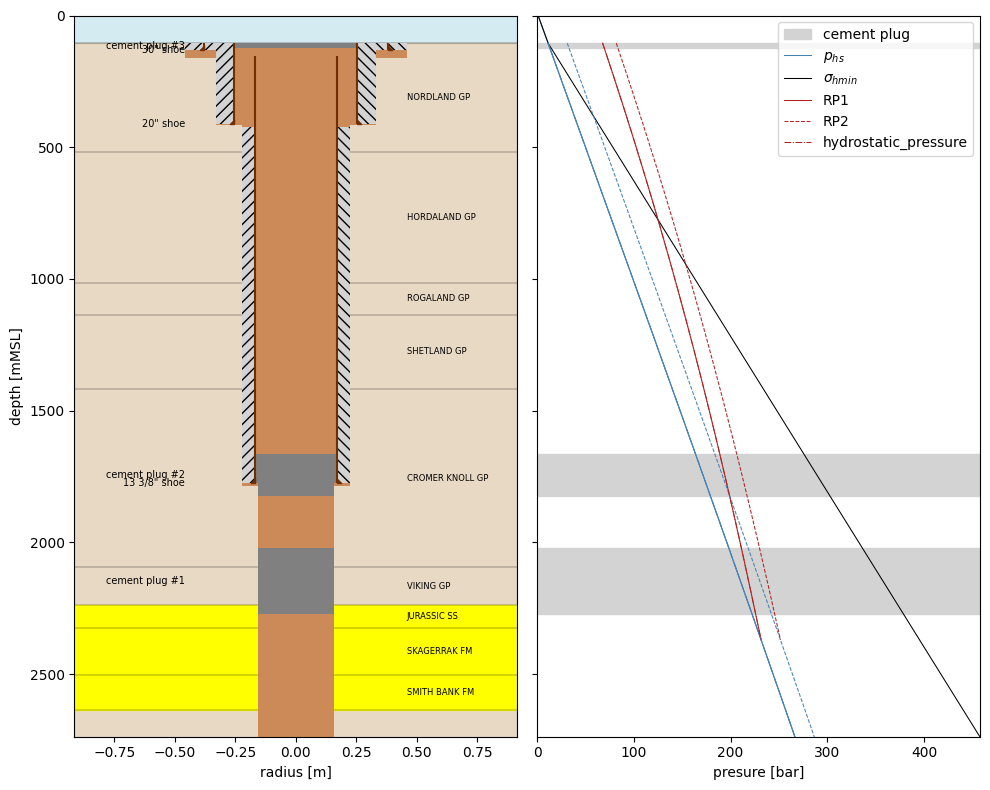

In [28]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2)

fig.tight_layout()

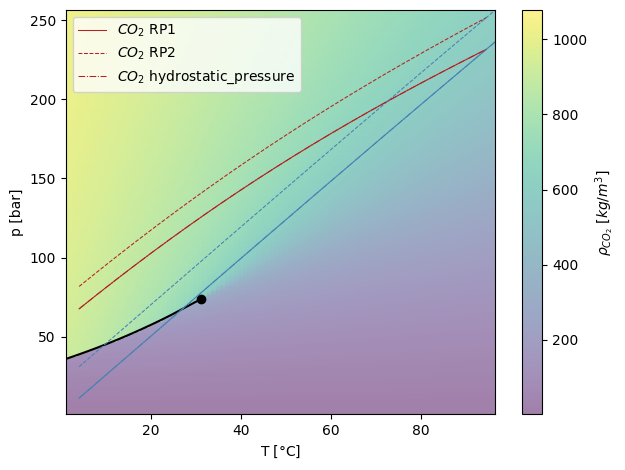

In [29]:
plot_pt(my_pressure)

# CO2 Leakage

In [30]:
print(json.dumps(my_well.barrier_perm, indent=2))

{
  "quality": {
    "0": "good",
    "1": "mid",
    "2": "poor"
  },
  "kv": {
    "0": 0.01,
    "1": 10.0,
    "2": 1000.0
  }
}


In [31]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

'cement plug #1'

In [32]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

barrier_perm:  {0: 0.01, 1: 10.0, 2: 1000.0}


,0.01,10.00,1000.00
RP1,0,0.00968,0.97926
RP2,0,0.01464,1.47506
